# Pénzérme felismerés

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

A vizsgálni kívánt fotóbeolvasása és átméretezése:


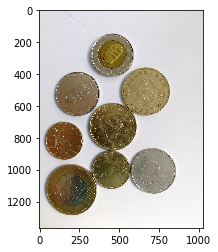

In [2]:
filename = "10.jpg"
img = cv2.imread(os.path.join("proba_kepek", filename))

d = 1024 / img.shape[1]
dim = (1024, int(img.shape[0] * d))
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized[:,:,::-1])
plt.show()

A vizsgált RGB kép szürkeárnyalatos képpé került konvertálásra.

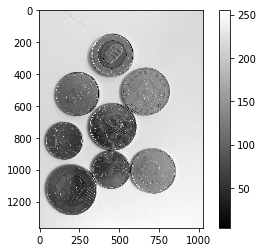

In [3]:
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = "gray")
plt.colorbar()
plt.show()

Gaussian szűrő alkalmazása a fotón.

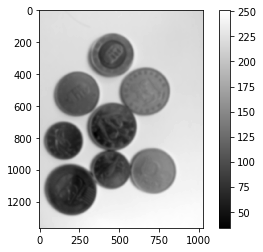

In [4]:
blur_img = cv2.GaussianBlur(img_gray,(35,35), 0)
plt.imshow(blur_img, cmap = "gray")
plt.colorbar()
plt.show()

In [5]:
circles = cv2.HoughCircles(blur_img,cv2.HOUGH_GRADIENT,1,120,param1=40,param2=35, minRadius=50, maxRadius=160)
print("A megtalál körök egy tömben kerültek eltárolásra:",'\n')
print(circles)

print('\n',"A feldolgozott képen", circles.shape[1], "kör került feltalálásra.")
   


A megtalál körök egy tömben kerültek eltárolásra: 

[[[ 665.5  509.5  150.6]
  [ 457.5  731.5  150.5]
  [ 233.5  524.5  142.8]
  [ 714.5 1009.5  140.3]
  [ 153.5  817.5  118.6]
  [ 459.5  276.5  130.1]
  [ 450.5 1001.5  118.9]
  [ 201.5 1125.5  159.4]]]

 A feldolgozott képen 8 kör került feltalálásra.


A feltalált érméket ábrázoló részek kivágása, azoknak a szín összetevőinek vizsgálata, valamint fényességük korrigálása.

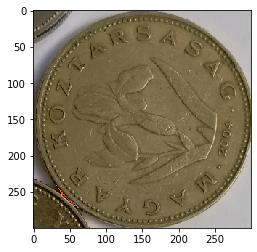

[ 80.30555556 108.99907778 120.96574444]


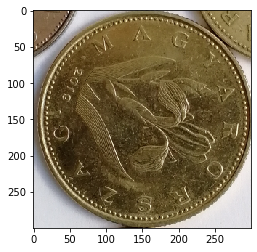

[ 71.56196667 103.03814444 118.7375    ]


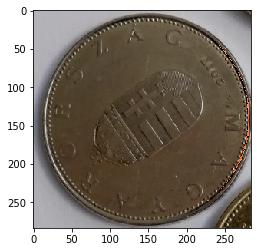

[ 77.74355287  91.19317844 102.6822927 ]


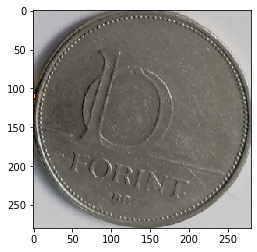

[108.36752551 115.69790816 118.55233418]


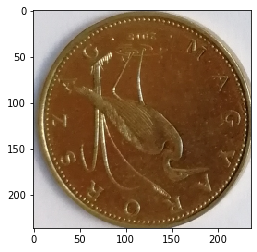

[ 69.45872235  99.25978526 129.98646222]


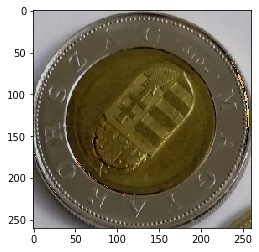

[ 67.7510355   91.88023669 101.34282544]


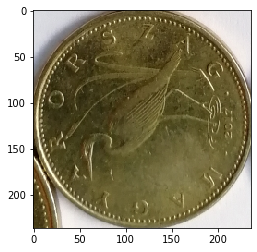

[ 74.52032462 109.29707699 118.36521474]


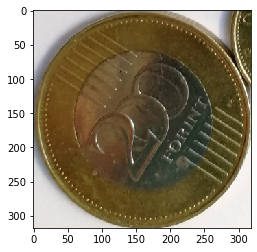

[ 72.39141055 100.86137811 114.73475139]


In [6]:
circles_color = []
for i in circles[0,:]:
    x=int(i[0])
    y=int(i[1])
    d=int(i[2])
    roi = resized[y - d:y + d, x - d:x + d]
   
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    avg_hsv_per_row = np.average(hsv, axis=0)
    avg_hsv = np.average(avg_hsv_per_row, axis=0)
    
    
    
    if (avg_hsv[2] > 140):
        hsv[:,:,2] -= 40
        img2 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        plt.imshow(img2[:,:,::-1])
        plt.show()
        avg_color_per_row = np.average(img2, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        print(avg_color)
        circles_color.append(avg_color)
    
    else:
        plt.imshow(roi[:,:,::-1])
        plt.show()
        avg_color_per_row = np.average(roi, axis=0)
        avg_color = np.average(avg_color_per_row, axis=0)
        print(avg_color)
        circles_color.append(avg_color)

A megtalál körök kirajzolása.

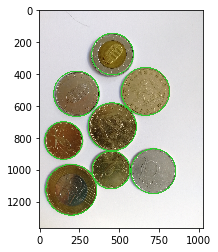

In [7]:
resized_withcircle = resized.copy()

for i in circles[0,:]:
    cv2.circle(resized_withcircle,(i[0],i[1]),i[2],(50,200,50),5)

plt.imshow(resized_withcircle[:,:,::-1])
plt.show()

A megtalált érmék érékeinek meghatározása, és az értékek összegének kiszámolása a feltalált körök átmérőjének és szín összetevőjének felhasználásával.

In [8]:
feltalalt_ermek_osszerteke = 0
feltalalt_ermek = [0,0,0,0,0,0]
ermek = [5,10,20,50,100,200]
z = 0 
for i in circles[0,:]:
    if (i[2] <= 130 and circles_color[z][0] < 85):
        feltalalt_ermek_osszerteke += 5
        feltalalt_ermek[0] += 1
    elif (i[2] > 130 and i[2] <=136 and circles_color[z][0] < 85):
        feltalalt_ermek_osszerteke += 100
        feltalalt_ermek[4] += 1
    elif (i[2] > 144 and i[2] <=153 and circles_color[z][0] < 85):
        feltalalt_ermek_osszerteke += 20
        feltalalt_ermek[2] += 1
    elif (i[2] > 153 and circles_color[z][0] < 85):
        feltalalt_ermek_osszerteke += 200
        feltalalt_ermek[5] += 1
    elif (i[2] > 135 and i[2] <=150):
        feltalalt_ermek_osszerteke += 10
        feltalalt_ermek[1] += 1
    elif (i[2] > 150 and i[2] <=160):
        feltalalt_ermek_osszerteke += 50
        feltalalt_ermek[3] += 1
    
        
    z = z + 1

Eredmény összesítés egy kép vonatkozásában.

In [9]:
feltalalt_ermek_szama = circles.shape[1]
print("A ", filename, " fájlban a feltalált érmék darab száma: ", feltalalt_ermek_szama, 
      "a feltalált érmék kiszámított összértéke pedig", feltalalt_ermek_osszerteke, ".")
print ("A feltalált érmék:")
z = 0
for i in feltalalt_ermek:
    print( i, " db.", ermek[z], "Ft-os")
    z = z + 1

A  10.jpg  fájlban a feltalált érmék darab száma:  8 a feltalált érmék kiszámított összértéke pedig 370 .
A feltalált érmék:
2  db. 5 Ft-os
2  db. 10 Ft-os
2  db. 20 Ft-os
0  db. 50 Ft-os
1  db. 100 Ft-os
1  db. 200 Ft-os


Az algoritmus hatásfokának ellenőrzése: 

In [10]:
talat_eredmeny_tomb = []
eredmeny_tomb = []
f = open(os.path.join("proba_kepek", "eredmenyek.txt"))
x = f.readlines()
f.close()
for i in x:
    eredmeny_tomb.append(i.split())
    
for i in range(1,(len(eredmeny_tomb))):
    filename = str(i) + ".jpg"
    img = cv2.imread(os.path.join("proba_kepek", filename))
    d = 1024 / img.shape[1]
    dim = (1024, int(img.shape[0] * d))
    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    blur_img = cv2.GaussianBlur(img_gray,(21,21), 0)
    circles = cv2.HoughCircles(blur_img,cv2.HOUGH_GRADIENT,1,120,param1=40,param2=35, minRadius=50, maxRadius=160)
    
    circles_color = []
    for i in circles[0,:]:
        x=int(i[0])
        y=int(i[1])
        d=int(i[2])
        roi = resized[y - d:y + d, x - d:x + d]

        hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
        avg_hsv_per_row = np.average(hsv, axis=0)
        avg_hsv = np.average(avg_hsv_per_row, axis=0)

        if (avg_hsv[2] > 140):
            hsv[:,:,2] -= 40
            img2 = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
            avg_color_per_row = np.average(img2, axis=0)
            avg_color = np.average(avg_color_per_row, axis=0)
            circles_color.append(avg_color)

        else:
            avg_color_per_row = np.average(roi, axis=0)
            avg_color = np.average(avg_color_per_row, axis=0)
            circles_color.append(avg_color)
    
    feltalalt_ermek_osszerteke = 0
    feltalalt_ermek = [0,0,0,0,0,0]
    ermek = [5,10,20,50,100,200]
    z = 0 
    for i in circles[0,:]:
        if (i[2] <= 130 and circles_color[z][0] < 85):
            feltalalt_ermek_osszerteke += 5
            feltalalt_ermek[0] += 1
        elif (i[2] > 130 and i[2] <=136 and circles_color[z][0] < 85):
            feltalalt_ermek_osszerteke += 100
            feltalalt_ermek[4] += 1
        elif (i[2] > 144 and i[2] <=153 and circles_color[z][0] < 85):
            feltalalt_ermek_osszerteke += 20
            feltalalt_ermek[2] += 1
        elif (i[2] > 153 and circles_color[z][0] < 85):
            feltalalt_ermek_osszerteke += 200
            feltalalt_ermek[5] += 1
        elif (i[2] > 135 and i[2] <=150):
            feltalalt_ermek_osszerteke += 10
            feltalalt_ermek[1] += 1
        elif (i[2] > 150 and i[2] <=160):
            feltalalt_ermek_osszerteke += 50
            feltalalt_ermek[3] += 1

        z = z + 1

    aktualis_eredmeny = [filename,circles.shape[1], feltalalt_ermek_osszerteke]
    talat_eredmeny_tomb.append(aktualis_eredmeny)

eltalalt_darab_szamok = 0
eltalat_ossz_ertek = 0
    
for i in range(0,(len(eredmeny_tomb)-1)):
    
    #print(eredmeny_tomb[i][0])
    #print(eredmeny_tomb[i][1], "   ", talat_eredmeny_tomb[i][1])
    #print(eredmeny_tomb[i][2], "   ", talat_eredmeny_tomb[i][2])
    
    if (int(eredmeny_tomb[i][1]) == int(talat_eredmeny_tomb[i][1])):
        eltalalt_darab_szamok +=1
    if (int(eredmeny_tomb[i][2]) == int(talat_eredmeny_tomb[i][2])):
        eltalat_ossz_ertek +=1
 
print(" Az érmek darab számát", (len(eredmeny_tomb)) ,"kép feldolgozása során, az algoritmus ", int(eltalalt_darab_szamok/(len(eredmeny_tomb)-2) * 100), "% ban találta el, míg az érmék összértékét ", int(eltalat_ossz_ertek/(len(eredmeny_tomb)-2) * 100), "% ban." )

 Az érmek darab számát 27 kép feldolgozása során, az algoritmus  96 % ban találta el, míg az érmék összértékét  80 % ban.
